__Exploratory Data Analysis__: Understanding data using simple visualization techniques before building the machine learning model.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib import style
from statsmodels import robust

import ipywidgets as widgets
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
style.use(style="seaborn-whitegrid")

__Iris Dataset__

![](https://miro.medium.com/max/1100/0*SHhnoaaIm36pc1bd "Iris Dataset")

In [4]:
iris = pd.read_csv(filepath_or_buffer="iris-data.csv")

In [5]:
features = list(iris.columns)[:-1]
display(features)

target = list(iris.columns)[-1]
display(target)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

'species'

In [6]:
setosa = iris[iris[target] == 'setosa']
versicolor = iris[iris[target] == 'versicolor']
virginica = iris[iris[target] == 'virginica']

What is the dimension of the data?

In [7]:
display(iris.shape)

(150, 5)

What are the columns of the data?

In [8]:
display(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

How many data-points are there for each class?

In [9]:
display(iris[[target]].value_counts())

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

Statistics

In [10]:
display(iris.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Balanced Data Vs Imbalanced Data__

If each class-label in the dataset have _equal_ data-points, then that dataset is called as balanced dataset. Iris dataset is a balanced dataset.

If each class-label in the dataset have _unequal_ data-points, then that dataset is called as imbalanced dataset.

__Scatter Plot (2D)__

Tip: Always read the axis-label and scale of a plot.

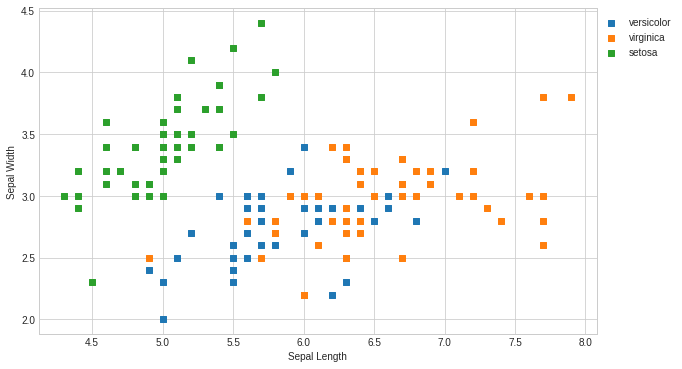

In [11]:
plt.figure(figsize=(10, 6))

for specie in list(set(iris[target].to_list())):
    plt.scatter(x=iris[iris[target] == specie]['sepal_length'],
                y=iris[iris[target] == specie]['sepal_width'],
                label=specie,
                marker='s')
plt.xlabel(xlabel='Sepal Length')
plt.ylabel(ylabel='Sepal Width')
plt.legend(bbox_to_anchor=(1.15,1))
plt.show()
plt.close(fig='all')

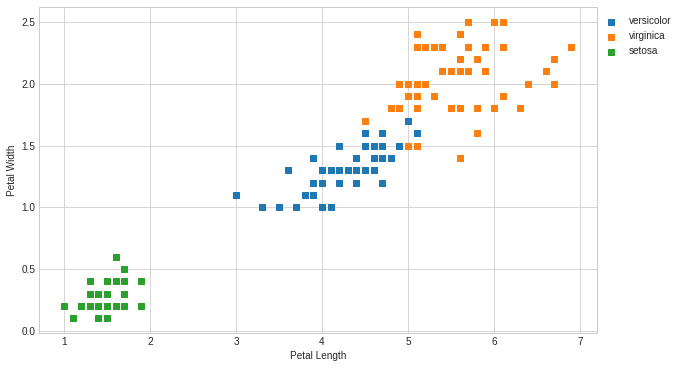

In [12]:
plt.figure(figsize=(10, 6))

for specie in list(set(iris[target].to_list())):
    plt.scatter(x=iris[iris[target] == specie]['petal_length'],
                y=iris[iris[target] == specie]['petal_width'],
                label=specie,
                marker='s')
plt.xlabel(xlabel='Petal Length')
plt.ylabel(ylabel='Petal Width')
plt.legend(bbox_to_anchor=(1.15,1))
plt.show()
plt.close(fig='all')

__Pair Plots__

The problem with higher dimensional data is, we cannot represent them in 2D surfaces. But, with the help of pair plots, we can plot the scatter plot for each feature. For example, if we have 4 features in our data, then we can generate `4C2 = 6` unique scatter plots to understand the relationship of each feaure with every other feaure.

But if the features are more than 6, then pair plots are not a good approach to understand the data with, so, we use PCA and t-SNE techniques.

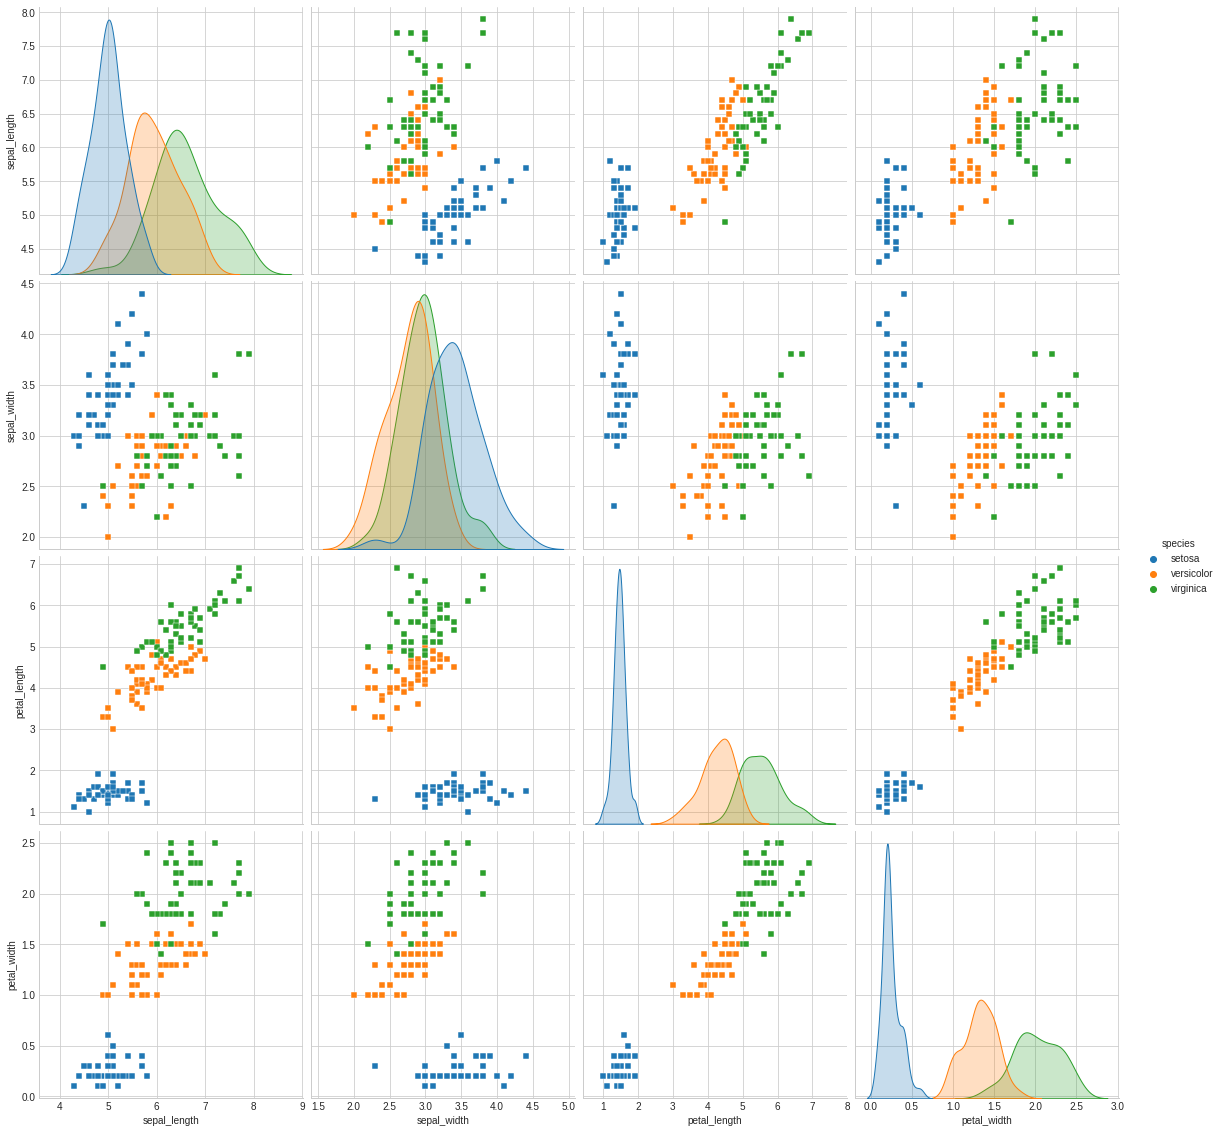

In [13]:
sns.pairplot(data=iris, hue=target, size=4, markers='s')
plt.show()
plt.close(fig='all')

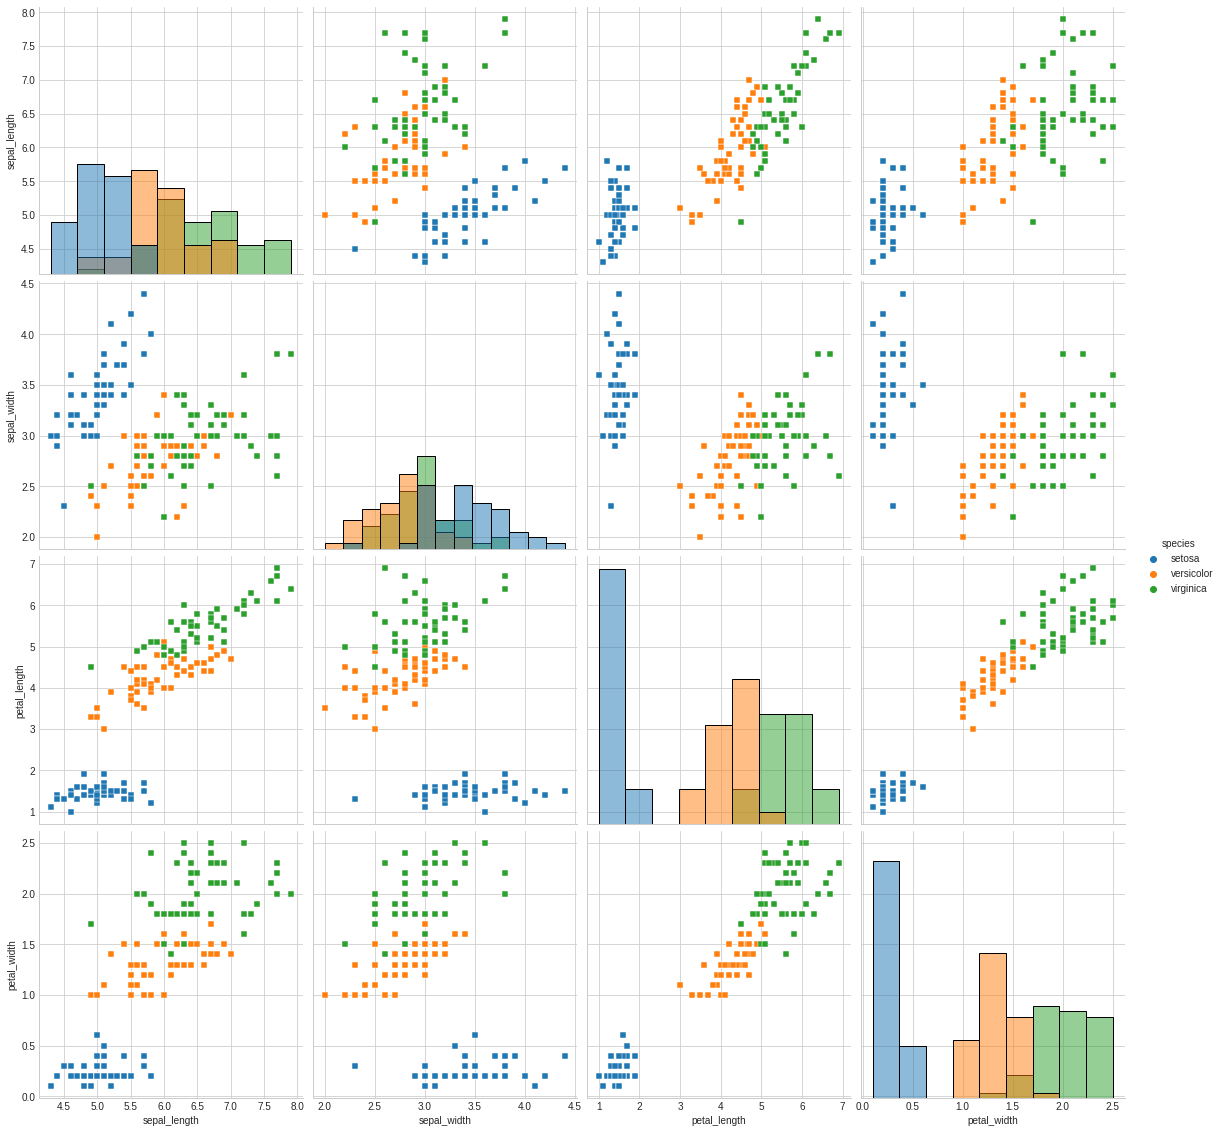

In [14]:
sns.pairplot(data=iris, hue=target, size=4, markers='s', diag_kind='hist')
plt.show()
plt.close(fig='all')

__Scatter Plot (1D)__

In [15]:
def plotter(df_list, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        for df in df_list:
            plt.subplot(int('22' + '{}'.format(i+1)))
            plt.scatter(x=df[feature],
                        y=np.zeros_like(a=df[feature]),
                        label=df[target].tolist()[0],
                        marker='s')
        plt.legend()
        plt.xlabel(xlabel=feature)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

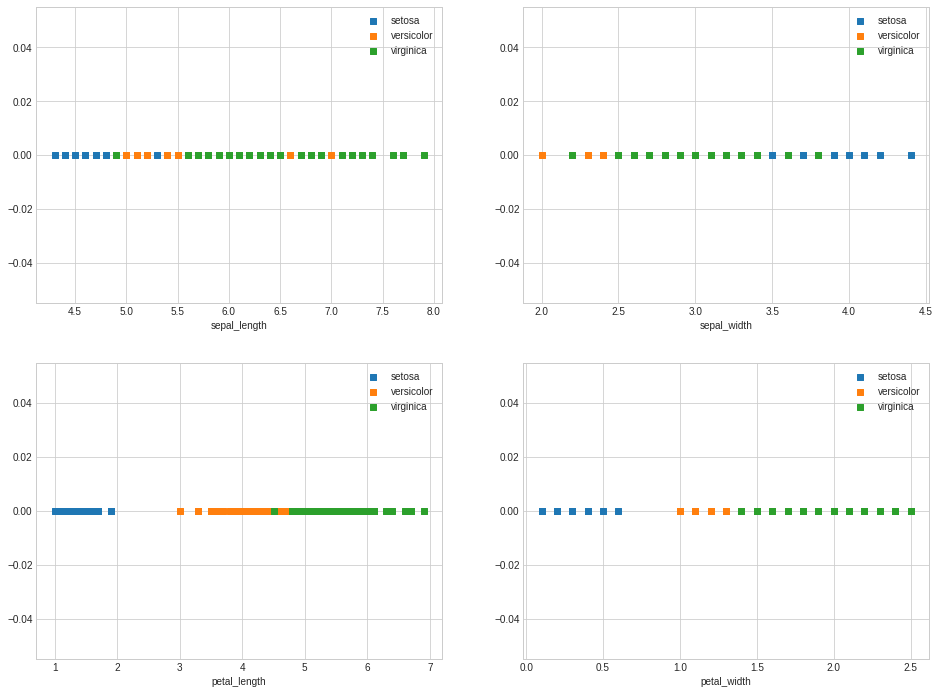

In [16]:
plotter(df_list=[setosa, versicolor, virginica],
        features=features)

In [17]:
def plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('22' + '{}'.format(i+1)))
        sns.histplot(data=df, x=feature, hue=target, binwidth=0.1, kde=True)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

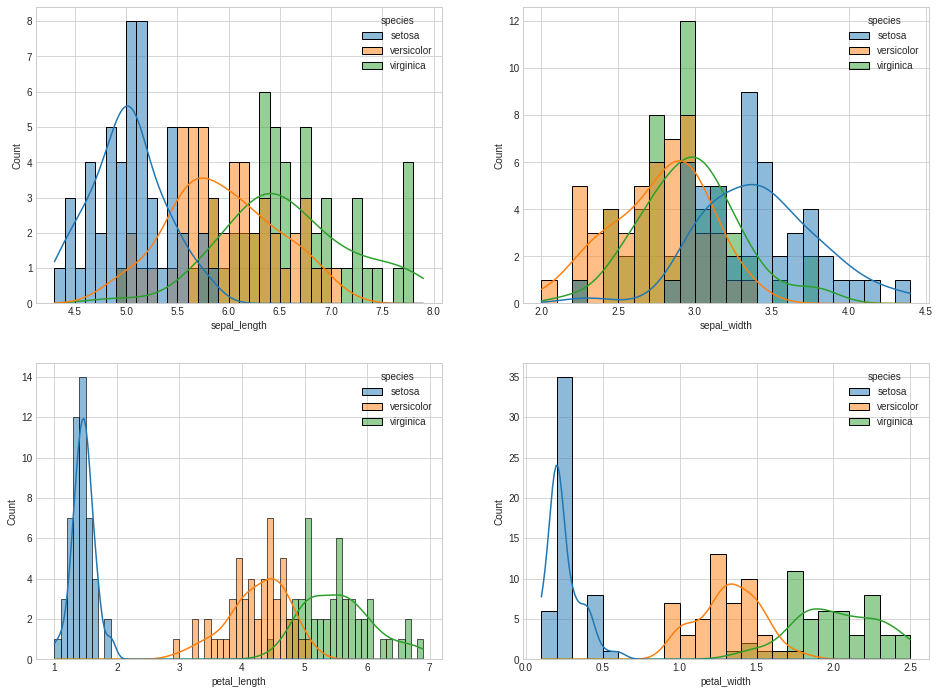

In [18]:
plotter(df=iris, features=features)

In [19]:
def plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('22' + '{}'.format(i+1)))
        sns.histplot(data=df, x=feature, hue=target, binwidth=0.1)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

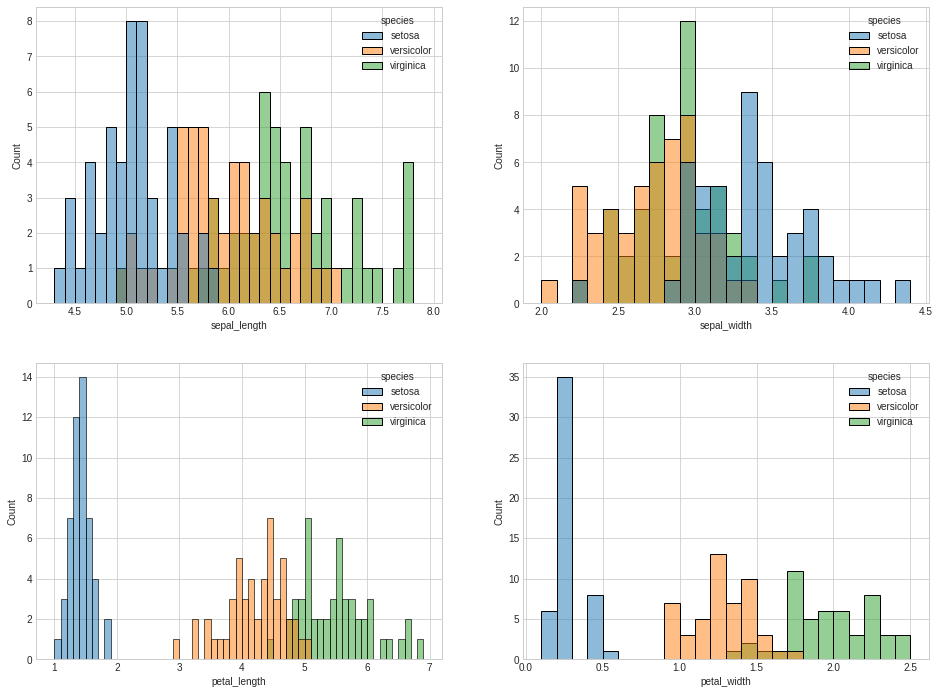

In [20]:
plotter(df=iris, features=features)

Histograms are very good to understand the density of how many points exist in which interval, but it cannot give us the details of quantiles of the data such as what is the $25^{th}$ percentile of the data. Box-Plots will fill this gap. They give the quantine information on a plot.

Kernel Density Estimation (KDE)

In statistics, kernel density estimation (KDE) is a way to estimate the probability density function of a random variable. In simple words, it is smoothed histogram.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/750px-Comparison_of_1D_histogram_and_KDE.png)

Comparison of the histogram (left) and kernel density estimate (right) constructed using the same data. The six individual kernels are the red dashed curves, the kernel density estimate the blue curves. The data points are the rug plot on the horizontal axis.

In [21]:
def plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('22' + '{}'.format(i+1)))
        sns.kdeplot(data=df, x=feature, hue=target)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

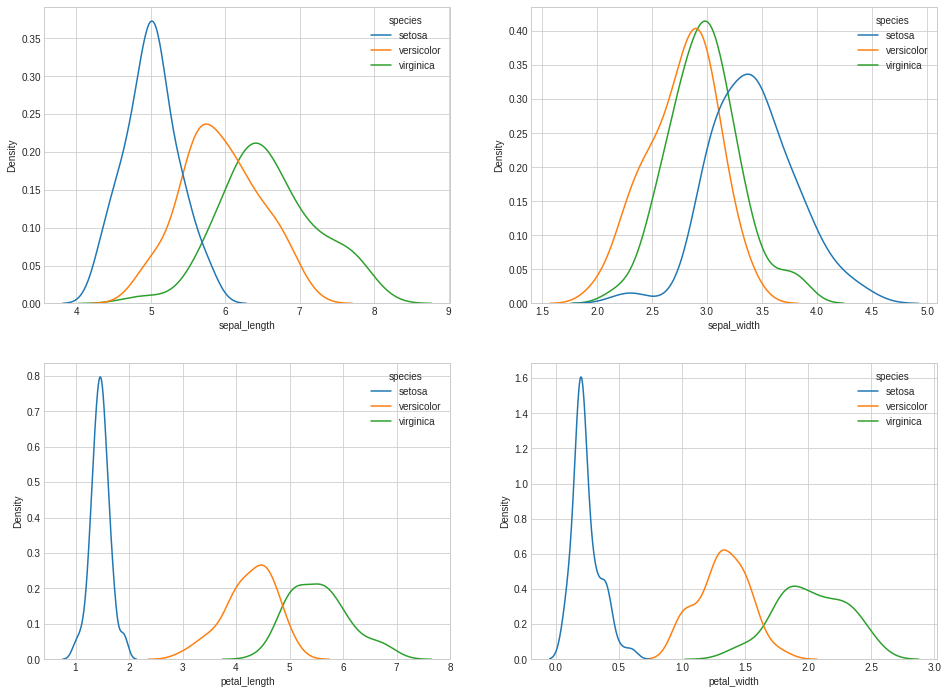

In [22]:
plotter(df=iris, features=features)

__Univariate Analysis__

From the above 4 plots, we see that `petal_length` and `petal_width` are good features because their _density curves_ do not overlap much across the __species__ class-label, when compared to `sepal_length` and `sepal_width`.

Hence, `sepal_length` and `sepal_width` are bad feaures.

---

__Probability Distribution Functions__

1. Probability Mass Function
2. Probability Density Function
3. Cumulative Distribution Function

__Probability Mass Function (PMF)__

Probability distribution of a discrete random variable. For example, the probability mass function of a fair die. All the numbers on the die have an equal chance of appearing on top when the die stops rolling.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Fair_dice_probability_distribution.svg/330px-Fair_dice_probability_distribution.svg.png "PMF")

Algorithm:

$$P(a \le X \le b) = \sum_{x: a \le x \le b} p_X(x)$$

Properties:
* $p_X(x) \ge 0$
* $\sum_{x} p_X(x) = 1$ --> summation of all probabilities.

Note: $p_X(x)$ is same as $P(X=x)$ which is PMF of discrete random variable $x$.

__Probability Density Function (PDF)__

Probability distribution of a continuous random variable. For example, the probability density function of a person's height. The variable height is a continuous random variable. A probability of person's height between a and b.

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Probability_Density_Function/Probability_Density_Function_1.png "PDF")

The PDF in and of itself does not give the probability, we must integrate the pdf to find the probability.

Algorithm:

$$P(a \le X \le b) = \int_{a}^{b} f_X(x)dx$$

Properties:
* $f_X(x) \ge 0$
* $\int_{-\infty}^{\infty} f_X(x)dx = 1$ --> area under the curve.

Note: $f_X(x)$ is PDF of continuous random variable $x$.

__Cumulative Distribution Function__

![](https://i.stack.imgur.com/tY38q.png "CDF")

__CDF - PMF/PDF & PMF/PDF - CDF__

![](https://greenteapress.com/thinkstats2/html/thinkstats2026.png)

PMF to CDF and CDF to PMF
* If we sum all the PMFs, we get CDFs for a discrete random variable.
* If we difference all the CDFs, we get PMFs for a discrete random variable.

PDF to CDF and CDF to PDF
* If we integrate the PDF for an interval $[-\infty, q]$ we get CDF till $q$ for a continuous random variable.
* If we differentiate (process of finding slope or gradient) the CDF, we get PDF for a continuous random variable.

In [23]:
def plotter(df_list, features, df_names):
    """
    This is funtion helps in plotting the dataframes.
    """
    for (df, df_name) in zip(df_list, df_names):
        plt.figure(figsize=(18, 16))
        for (i, feature) in zip(range(len(features)), features):
            plt.subplot(int('{}{}{}'.format(len(df_list), len(features), i+1)))
            counts, bin_edges = np.histogram(a=df[feature], bins=10, density=True)
            pdf = counts / (sum(counts))
            cdf = np.cumsum(pdf)
            plt.plot(bin_edges[1:], pdf, label='PDF')
            plt.plot(bin_edges[1:], cdf, label='CDF')
            plt.xlabel(xlabel='{} - {}'.format(df_name, feature))
            plt.legend()
    plt.show()
    plt.close(fig='all')
    return None

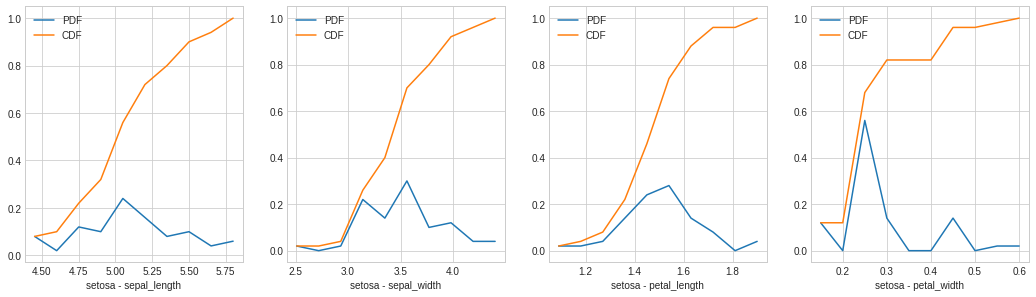

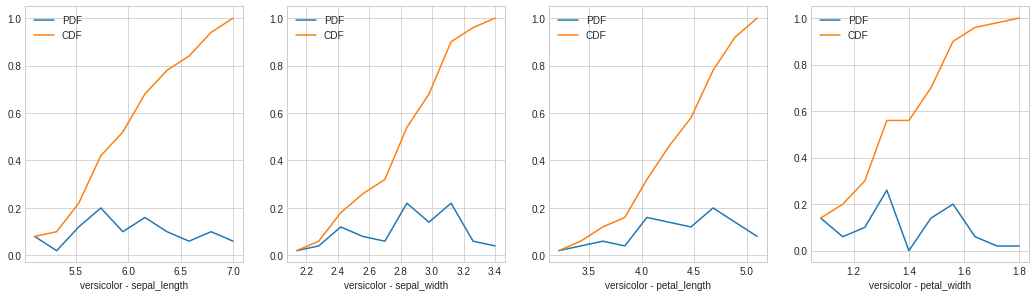

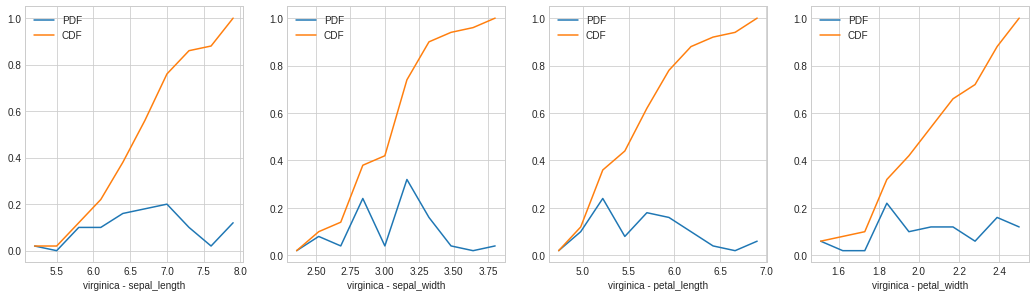

In [24]:
plotter(df_list=[setosa, versicolor, virginica],
        features=features,
        df_names=['setosa', 'versicolor', 'virginica'])

---

__Percentiles and Quantiles__

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Percentile_In_Statistics_1.png)

In statistics and probability, __quantiles__ are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way. __There is one fewer quantile than the number of groups created.__

Common quantiles have special names, such as 
* quartiles (four groups),
* deciles (ten groups), and
* percentiles (100 groups)

![](https://i.stack.imgur.com/dTDGD.png)

![](https://aakinshin.net/posts/qrde-hd/img/riddle-light.png)

Some q-quantiles have special names:
* The only __2-quantile__ is called the __median__
* The __3-quantiles__ are called __tertiles__ or __terciles__ → T
* The __4-quantiles__ are called __quartiles__ → Q
* The __5-quantiles__ are called __quintiles__ → QU
* The __6-quantiles__ are called __sextiles__ → S
* The __7-quantiles__ are called __septiles__
* The __8-quantiles__ are called __octiles__
* The __10-quantiles__ are called __deciles__ → D
* The __12-quantiles__ are called __duo-deciles__ or __dodeciles__
* The __16-quantiles__ are called __hexadeciles__ → H
* The __20-quantiles__ are called __ventiles__, __vigintiles__, or __demi-deciles__ → V
* The __100-quantiles__ are called __percentiles__ → P
* The __1000-quantiles__ have been called __permilles__ or __milliles__, but these are rare and largely obsolete

In statistics, a __quartile__ is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size. The data must be ordered from smallest to largest to compute quartiles; as such, quartiles are a form of order statistic. The three main quartiles are as follows:
* The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.

In [25]:
print("[Q1 Q2 Q3] -->", np.percentile(a=setosa['petal_length'], q=np.array([25, 50, 75])))
print("[Q1 Q2 Q3] -->", np.percentile(a=versicolor['petal_length'], q=np.array([25, 50, 75])))
print("[Q1 Q2 Q3] -->", np.percentile(a=virginica['petal_length'], q=np.array([25, 50, 75])))

[Q1 Q2 Q3] --> [1.4   1.5   1.575]
[Q1 Q2 Q3] --> [4.   4.35 4.6 ]
[Q1 Q2 Q3] --> [5.1   5.55  5.875]


---

__Median Absolute Deviation__

In statistics, the __median absolute deviation (MAD)__ is a robust measure of the variability of a univariate sample of quantitative data. For a univariate data set $X_1, X_2, \dots, X_n$, the MAD is defined as the median of the absolute deviations from the data's median.

MAD $=$ median($|X_i - \tilde{X}|$) where $\tilde{X} =$ median($X$)

The simple understanding of why we use absolute deviation instead of squaring to calculate MAD is because we know median is less sensitive to extreme outliers. If we square the differences (or deviations) then MAD value will be more.

Absolute deviations are less sensitive to outliers which is similar to median as median is also less sensitive to deviation.
Standard deviations are more affected by outliers similar to mean hence we square it. Squaring has mathematical advantages, we can compute derivative or integral which makes it convenient to work with inside proofs and solving equations analytically. Graphically speaking, absolute deviations does not create a smoothed curve and squaring the deviations on the other hand creates smoothed curve.

Uses

The median absolute deviation is a measure of statistical dispersion. Moreover, the MAD is a robust statistic, being __more resilient to outliers__ in a data set than the standard deviation. In the standard deviation, the distances from the mean are squared, so large deviations are weighted more heavily, and thus outliers can heavily influence it. In the MAD, the deviations of a small number of outliers are irrelevant.

Because the MAD is a more robust estimator of scale than the sample variance or standard deviation, it works better with distributions without a mean or variance, such as the Cauchy distribution

In [26]:
print("MAD -->", robust.mad(a=setosa['petal_length']))

MAD --> 0.14826022185056031


---

__Box-Plot with Whiskers__

This plot gives detailed visualization of quantiles, minimum and maximum values. It typically plots L, $Q_1$, $Q_2$, $Q_3$ and H of the data where,
* L is the lowest value in the data set.
* $Q_1$ is the first quantile (also known as the 25th empirical quartile, as 25% of the data is below this point).
* $Q_2$ is the second quantile (also known as the median of a data set; thus 50% of the data lies below this point).
* $Q_3$ is the third quantile (also known as the 75th empirical quartile, as 75% of the data lies below this point).
* H is the highest value in the data set.

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [27]:
def plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('22' + '{}'.format(i+1)))
        sns.boxplot(x=target, y=feature, data=df, width=0.5)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

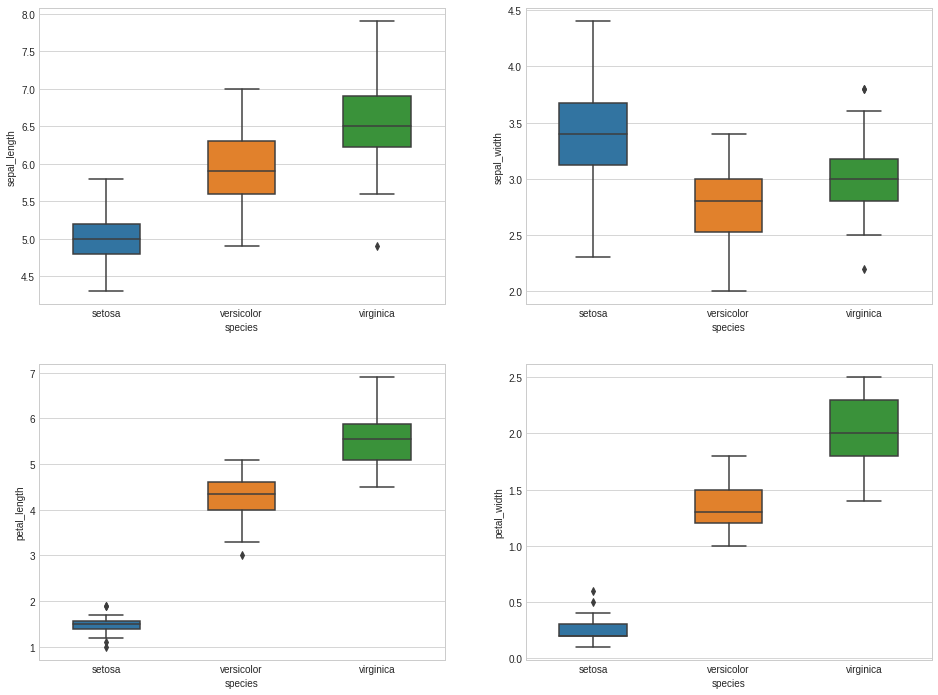

In [28]:
plotter(df=iris, features=features)

---

On Outliers

There are several reasons why you would not delete outliers. And all of these reasons depend on the size, shape, and structure of your data set, as well as what you want to do with the data and what models you might use to analyze it.

First off why would you ever delete any data anyways? A few reasons, one might be because it helps you model the data better and predict future data better. If this is true then it is fast and easy to just delete outliers that don't help you predict. But what if you could just change parts of the outliers and you get better prediction? This can be the case, so if you have time, transforming the outliers can be better than deletion because while parts of the outlier observations hurt prediction other parts may help.

Second, you may have a lot of data and deleting a few pesky outliers doesn't effect the model either way but it looks better when graphed. This seems unethical but if you don't want to draw attention to outliers then maybe you should not model them.

Third you may have a very small data set and the model you choose is greatly affected by the outliers. In this case you must be careful because the outcome is significantly different if outliers are included. And if you have no good reason to see those values as not truly belonging in the data set then deleting them would bias your results significantly. You may think the values are outliers but in reality they represent an under sampled part of the data and so if you throw them out your model only represents part of the real data and can not predict a significant portion of reality.

Throwing away data is the same as only modeling part of the data! In general the more data you have the better your model.

In the end it depends. It is generally a good idea to find a model that can incorporate outliers. However depending on the reason for the analysis deleting or better yet transforming the outliers could be a better strategy.

If the outliers don't reflect reality because they are mistakes then delete them. But the real world is filled with outliers, so if you want to model the real world you can't delete the parts of it you think don't belong.

---

In [29]:
def plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('22' + '{}'.format(i+1)))
        sns.violinplot(x=target, y=feature, data=df)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

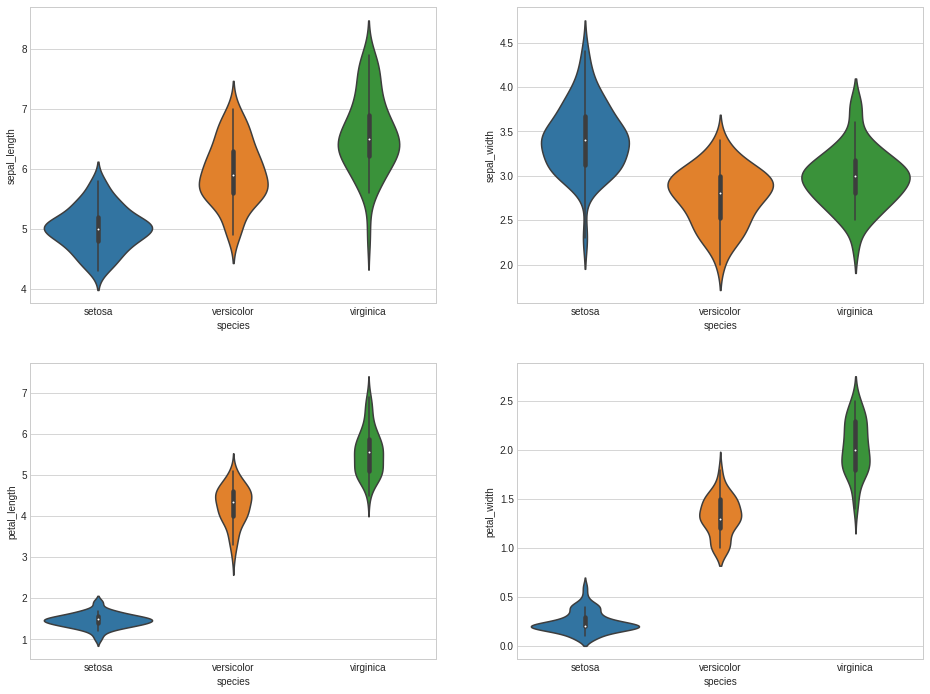

In [30]:
plotter(df=iris, features=features)

---

In [31]:
def plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 12))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('22' + '{}'.format(i+1)))
        sns.swarmplot(x=feature, y=target, data=df, linewidth=0.5, size=6)
        i += 1
    plt.show()
    plt.close(fig='all')
    return None

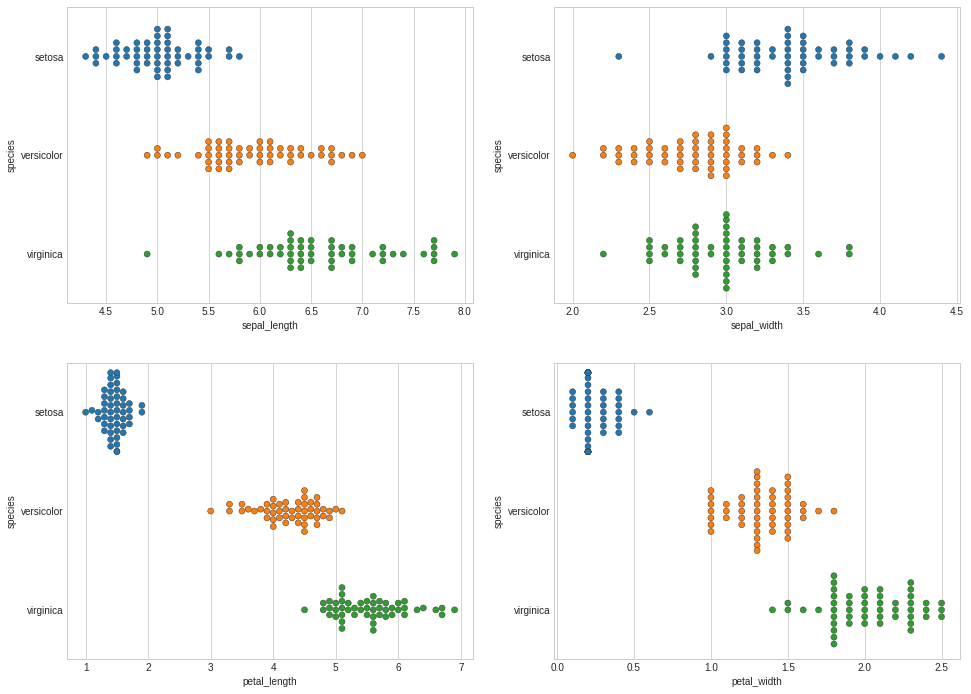

In [32]:
plotter(df=iris, features=features)

Interactive plotting using `ipywidgets`

In [33]:
def plotter(Feature, Width=1):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=iris, x=Feature, lw=2, shade=True, bw_adjust=Width, color='k')
    plt.show()
    plt.close(fig='all')
    return None

In [34]:
widgets.interact(plotter, Width=(.1, 3), Feature=features);

interactive(children=(Dropdown(description='Feature', options=('sepal_length', 'sepal_width', 'petal_length', …

---

__Joint Probability Distribution__

Link: https://youtu.be/SrEmzdOT65s

Given two random variables that are defined on the same probability space, the joint probability distribution is the corresponding probability distribution on all possible pairs of outputs. The joint distribution can just as well be considered for __any__ given number of random variables.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Multivariate_normal_sample.svg/450px-Multivariate_normal_sample.svg.png)

Many sample observations (black) are shown from a joint probability distribution. The marginal densities are shown as well.

Joint PMF

The joint probability mass function of two discrete random variables $X$, $Y$ is:

$$p_{X, Y}(x, y) = P(X = x \cap Y = y)$$

Joint PDF

The joint probability density function of two discrete random variables $X$, $Y$ is defined as the derivative of the joint cumulative distribution function $F_{X, Y}(x, y)$

$$f_{X, Y}(x, y) = \frac{\partial^{2} F_{X, Y}(x, y)}{\partial x \partial y}$$

The joint pdf is indirectly defined. __A legitimate joint pdf is any function of two (or n) variables which is non-negative and which integrates to 1__.

__Marginal Probability Distribution__

Link: https://youtu.be/SrEmzdOT65s

The joint distribution encodes the marginal distributions, i.e. the distributions of each of the individual random variables.

![](https://user-images.githubusercontent.com/63338657/152632512-62793d57-3132-4967-949e-0edfe2d92cc5.png)

Marginal PMF

Given a known joint distribution of two discrete random variables, say, $X$ and $Y$, the marginal distribution of either variable – $X$ for example — is the probability distribution of $X$ when the values of $Y$ are not taken into consideration. This can be calculated by summing the joint probability distribution over all values of $Y$. Naturally, the converse is also true: the marginal distribution can be obtained for $Y$ by summing over the separate values of $X$.

$$p_X(x_i) = \sum_{j} p(x_i, y_j) \ \text{and} \ p_Y(y_j) = \sum_{i} p(x_i, y_j)$$

Joint and marginal distributions of a pair of discrete random variables, X and Y, dependent, thus having nonzero mutual information $I(X; Y)$. The values of the joint distribution are in the 3×4 rectangle; the values of the marginal distributions are along the right and bottom margins.

Marginal PDF

Given two continuous random variables $X$ and $Y$ whose joint distribution is known, then the marginal probability density function can be obtained by integrating the joint probability distribution, $f$, over $Y$, and vice versa. That is

$$f_X(x) = \int_{c}^{d} f(x, y)dy \ \text{and} \ f_Y(y) = \int_{a}^{b} f(x, y)dx$$

where $x \in [a, b]$, and $y \in [c, d]$.

__Conditional Probability Distribution__

Link: https://youtu.be/SrEmzdOT65s

Link: https://youtu.be/JGeTcRfKgBo

The joint distribution also encodes the conditional probability distributions, which deal with how the outputs of one random variable are distributed when given information on the outputs of the other random variable(s).

In probability theory and statistics, given two jointly distributed random variables $X$ and $Y$, the conditional probability distribution of $Y$ given $X$ is the probability distribution of $Y$ when $X$ is known to be a particular value; in some cases the conditional probabilities may be expressed as functions containing the unspecified value $x$ of $X$ as a parameter. When both $X$ and $Y$ are categorical variables, a conditional probability table is typically used to represent the conditional probability. The conditional distribution contrasts with the marginal distribution of a random variable, which is its distribution without reference to the value of the other variable.

Conditional PMF

For discrete random variables, the conditional probability mass function of $Y$ given $X = x$ can be written according to its definition as:

$$p_{Y|X}(y|x) = \frac{P_{X, Y}(x, y)}{P_X(x)}$$

where $P_{X, Y}(x, y)$ is a joint mass funtion of $X = x$ and $Y = y$, $P_X(x)$ is a marginal mass function of $X = x$ and is strictly positive ($P_X(x) > 0$) because it is in denominator.

The conditional probability mass function of $X$ given $Y = y$ can be written according to its definition as:

$$p_{X|Y}(x|y) = \frac{P_{X, Y}(x, y)}{P_Y(v)}$$

where $P_{X, Y}(x, y)$ is a joint mass funtion of $X = x$ and $Y = y$, $P_Y(y)$ is a marginal mass function of $Y = y$ and is strictly positive ($P_Y(y) > 0$) because it is in denominator.

Conditional PDF

For continuous random variables, the conditional probability density function of $Y$ given the occurrence of the value $x$ of $X$ can be written as:

$$f_{Y|X}(y|x) = \frac{f_{X, Y}(x, y)}{f_X(x)}$$

where $f_{X, Y}(x, y)$ is a joint density funtion of $X = x$ and $Y = y$, $f_X(x)$ is a marginal density funtion of $X = x$ and is strictly positive ($f_X(x) > 0$) because it is in denominator.

And the conditional probability density function of $X$ given the occurrence of the value $y$ of $Y$ can be written as:

$$f_{Y|X}(y|x) = \frac{f_{X, Y}(x, y)}{f_Y(y)}$$

where $f_{X, Y}(x, y)$ is a joint density funtion of $X = x$ and $Y = y$, $f_Y(x)$ is a marginal density funtion of $Y = y$ and is strictly positive ($f_Y(y) > 0$) because it is in denominator.

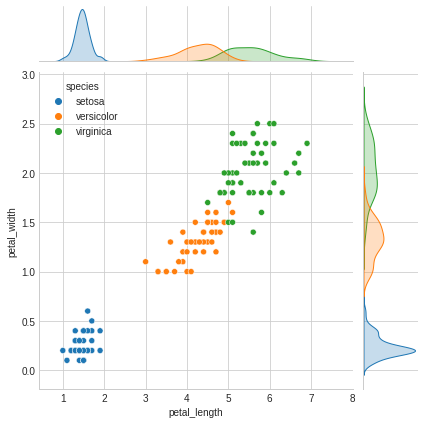

In [35]:
sns.jointplot(x='petal_length', y='petal_width', hue=target, data=iris, height=6)
plt.show()
plt.close(fig='all')

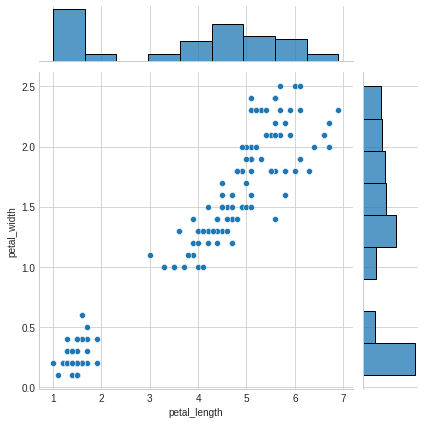

In [36]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, height=6)
plt.show()
plt.close(fig='all')

__Contour Plot__

Link: https://youtu.be/uaHiAxFESc4 (Level Curves)

A contour line (also isoline, isopleth, or isarithm) of a function of two variables is a curve along which the function has a constant value, so that the curve joins points of equal value. It is a plane section of the three-dimensional graph of the function $f(x, y)$ parallel to the $(x, y)$-plane. More generally, a contour line for a function of two variables is a curve connecting points where the function has the same particular value.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Courbe_niveau.svg/330px-Courbe_niveau.svg.png)

The bottom part of the diagram shows some contour lines with a straight line running through the location of the maximum value. The curve at the top represents the values along that straight line.

3D Surface | 2D Contour Graph
:---------:|:-------------:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Contour3D.jpg/435px-Contour3D.jpg) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Contour2D.svg/435px-Contour2D.svg.png)

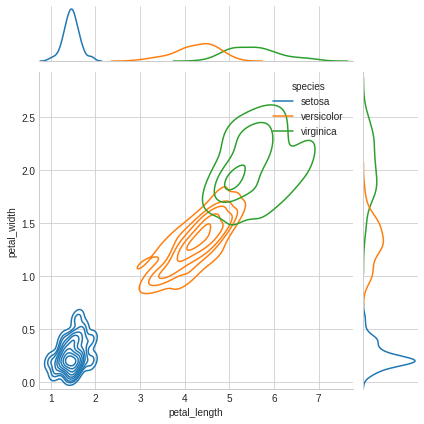

In [37]:
sns.jointplot(x='petal_length', y='petal_width', hue=target, data=iris, height=6, kind='kde')
plt.show()
plt.close(fig='all')

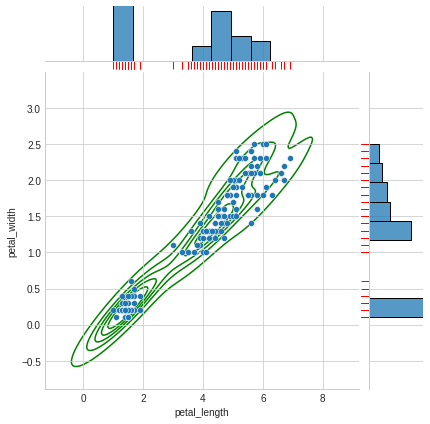

In [38]:
g = sns.jointplot(data=iris, x='petal_length', y='petal_width')
g.plot_joint(sns.kdeplot, color='g', zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color='r', height=-.15, clip_on=False)
plt.show()
plt.close(fig='all')